# P4 Vorlage: Laden und Verstehen von Daten mit Pandas

In diesem Versuch geht es darum, Daten mit Hilfe der Pandas-Bibliothek zu laden und zu verstehen. 

Zunächst benutzen wir die Pandas-Bibliothek um Daten in Form einer [CSV-Datei](https://de.wikipedia.org/wiki/CSV_(Dateiformat)) aus dem Internet herunterzuladen. Konkret handelt es sich in dieser Übung um statistische Daten von Spielen der National Basketball Association (NBA) von 1946 bis 2015.

In [1]:
import pandas as pd
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
nba = pd.read_csv(download_url)
type(nba)

pandas.core.frame.DataFrame

Hierbei wird ein sogenannter [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) mit dem Namen `nba` erzeugt. Vereinfacht kann man sich darunter eine Tabelle mit Spalten und Zeilen vorstellen. DataFrames sind **die** zentralen Datentypen in Pandas. Mit dem Befehl `type()` kann der Datentyp eines jeden Python-Objekts ausgegeben werden. 

<u>Hinweis:</u> Wenn die CSV-Datei nicht aus dem Internet heruntergeladen werden soll, sondern bereits auf der Festplatte des Rechners liegt, so lautet der Befehl zum Einlesen der Daten ins Jupyter Notebook `pd.read_csv("Name_der_Datei.csv")`.

### DataFrame untersuchen

Die Funktion `len()` aus dem Python Standard gibt bei pandas DataFrames wie erwartet die Anzahl der Zeilen aus.

In [2]:
len(nba)
# Expected:
# 126314

126314

Die (Pandas-)Funktion* `shape` gibt die "Form" das Frames aus, also die Zeilen- und Spaltenanzahl. 

*: Es ist eigentlich eine Funktion des Numpy-Pakets. Da Pandas aber zu weiten Teilen auf Numpy basiert, gibt es diese Unschärfe an vielen Stellen. Wenn Funktionen explizit in Pandas verfügbar sind, wird hier auf die Pandas API verwiesen ([vgl. pandas Dokumentation zu shape()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape)).

In [3]:
nba.shape
# Expected:
# (126314, 23)

(126314, 23)

Einen schnellen Blick in den DataFrame erhält man mit `head()`. Wird kein Parameter übergeben, so werden fünf Zeilen (und die Spaltenüberschriften) ausgegeben.

In [4]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


Bei sehr breiten Tabellen werden je nach Breite des Bildschirms automatisch Spalten bei der Anzeige ausgeblendet. Dies ist oben durch "..." in der Ausgabe gekennzeichnet.

Soll explizit die Anzahl der anzuzeigenden Spalten begrenzt oder wie im Beispiel unten aufgehoben werden (hier `None`), so kann dies durch das Setzen der Optionen des DataFrames mit `set_option()` geschehen (vgl. [Liste aller möglichen Optionen](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html?highlight=set_option#pandas.set_option)).

Nun wird die gesamte Breite des DataFrames ausgegeben.

In [5]:
pd.set_option("display.max.columns", None)
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


Die Option `display_precision` hilft die Anzeige von Gleitkomma lesbarer zu gestalten.

Analog zu `head()` liefert `tail()` das Ende, also die letzten Teilen eines Frames.

In [6]:
pd.set_option("display.precision", 2)
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


### Aufgabe

Geben Sie die letzten drei Zeilen des DataFrames aus.

## Den Inhalt des DataFrames kennenlernen

### Datentypen mit `.info()` anzeigen

Die `info()`-Funktion zeigt für alle Spalten des DataFrame die verwendeten Datentypen an. Hier hat Pandas beim Import der CSV-Datei zu Beginn alle Spalten analysiert und einen geeigneten Datentyp ausgewählt. 
* `int64` ist ein ganzzahliger numerischer 64-bit Datentyp 
* `float64` ist eine 64-bit Gleitkommazahl
* `object` ist der allen Datentypen zugrundeliegende Basisdatentyp in Pythons Datentypenhierarchie

Man erkennt, dass für alle numerischen Typen, abhängig vom Vorhandensein eines Kommas (oder Punkts),  entweder `int64` oder `float64` festgelegt wird, für alle anderen Spalten jedoch der sehr allgemeine Datentyp `object`. Folgen und Maßnahmen dazu lernen Sie im weiteren Verlauf kennen.

Interssant ist auch die Spalte `Non-Null-Count` in der Ausgabe. Alle Spalten haben für jede Zeile Werte, bis auf die Spalte `notes`, die nur in 5424 der 126314 Zeilen gefüllt ist.

In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

### (Mini-)Statistik mit  `.describe()`

Die Funktion `describe()` generiert eine zusammenfassende Statistik aller *numerischen* Spalten des DataFrames. Fehlende Werte (Not a Number, NaN) in den Spalten werden dabei ignoriert.  

* count: Anzahl der Zeilen, die gefüllt sind (also nicht NaN)
* mean: Arithmetisches Mittel
* std: Standardabweichung
* min/max: Minimum und Maximum
* 25%/50%/75% Perzentile: Quantile (Bsp für 25% Perzentil: 25% der Werte sind kleiner als X)

In [8]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


Eine Minimal-Statistik für nicht-numerische Typen erhält man, wenn man describe den parameter `include=object` übergibt.

In [9]:
nba.describe(include=object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,194611010TRH,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


### Explorative Datenanalyse mit Pandas (ein Anfang...)

Mit dem Index-Operator `[]` greifen wir zunächst auf die Spalte mit dem Label team_id zu. Die Funktion `value_counts()` berechnet die Anzahl der Datenpunkte mit gleichem Inhalt. In unserem Beispiel wird dadurch die Anzahl der Heimspiele für jede Mannschaft ermittelt.

In [10]:
nba["team_id"].value_counts()
# Expected:
# BOS    5997
# NYK    5769
# LAL    5078

# SDS      11

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

Benutzen wir die Spalte `fran_id` so wird das Gleiche für die Namen der Teams ermittelt. Beachten Sie dass für die Boston Celtics (BOS bzw. Celtics) der Wert übereinstimmt, die Lakers (LAL) aber abweichende Werte haben. Wie kann das sein?  (-> Antwort: siehe weiter unten.)

In [11]:
nba["fran_id"].value_counts()
# Expected:
# Lakers          6024
# Celtics         5997
# Knicks          5769

# Falcons           60
# Name: fran_id, dtype: int64

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

An  die Funktion `loc[]` kann als erstes Argument eine boolsche Bedingung (= Filter) und als zweites Argument eine Liste an auszugebenden Spalten übergeben werden.
Im Beispiel wird dadurch die Ermittlung der Spielanzahl nur für Zeilen mit dem Teamnamen `Lakers` durchgeführt. 

In [12]:
nba.loc[nba["fran_id"] == "Lakers", ("team_id", "fran_id")]
# Erlärung: Hier wird die team_id und die fran_id für alle Datenpunkte ausgegeben, für die gilt fran_id == "Lakers".

,team_id,fran_id
1136,MNL,Lakers
1152,MNL,Lakers
1159,MNL,Lakers
1170,MNL,Lakers
1183,MNL,Lakers
...,...,...
126016,LAL,Lakers
126052,LAL,Lakers
126086,LAL,Lakers
126115,LAL,Lakers


Wie sich zeigt, gibt es wohl zwei Teams mit dem Namen (bzw. der fran_id) Lakers: MNL und LAL. Zählen wir nun, wie oft darin LAL und MNL vorkommen:

In [13]:
nba.loc[nba["fran_id"] == "Lakers", ("team_id", "fran_id")].value_counts()
# Expected:
# LAL    5078
# MNL     946
# Name: team_id, dtype: int64

team_id  fran_id
LAL      Lakers     5078
MNL      Lakers      946
dtype: int64

Lassen Sie uns die Spiele der Lakers untersuchen. Dazu wandeln wir zuerst die Spalte mit dem Spieldatum in den richtigen Datentyp um. Bisher war die Spalte vom allgemeinen Typ object und somit nicht für Datumsoperationen nutzbar.

In [14]:
nba["date_played"] = pd.to_datetime(nba["date_game"])
nba.info()   # Wie man sieht, enthält die Datenbank nba nun eine neue Spalte mit dem Namen date_played.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

Das allererste Spiel des Teams MNL:

In [15]:
nba.loc[nba["team_id"] == "MNL", "date_played"].min()
# Expected:
# Timestamp('1948-11-04 00:00:00')

Timestamp('1948-11-04 00:00:00')

Das letzte Spiel des Teams MNL:

In [16]:
nba.loc[nba["team_id"] == "MNL", "date_played"].max()
# Expected:
# Timestamp('1960-03-26 00:00:00')

Timestamp('1960-03-26 00:00:00')

Die MNL Lakers (Minneapolis Lakers) waren also nur bis in die 60er Jahre aktiv. Danach ist das Team (bzw. das Franchise) von Minnesota nach Los Angeles umgezogen. [https://de.wikipedia.org/wiki/Los_Angeles_Lakers](https://de.wikipedia.org/wiki/Los_Angeles_Lakers)

Weitere Aggregatsfunktionen, wie zum Beispiel zum Bilden von Summen, finden Sie in der [Pandas Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats).

#### Aufgabe

Wie viele Punkte haben die Boston Celtics in allen Spielen dieser Datenbank erzielt?

## Pandas Datenstrukturen kennenlernen

### `Series`: Die "Basis"-Datenstruktur in Pandas

Man erzeugt eine neue sog. Series mit dem `Series()`-Befehl. Hier können z.B. Python Listen als Argument übergeben werden. Im Beispiel unten wird beispielhaft eine Reihe von Unternehmensumsätzen erzeugt.

In [17]:
revenues = pd.Series([5555, 7000, 1980])
revenues
# Expected:
# 0    5555
# 1    7000
# 2    1980
# dtype: int64

0    5555
1    7000
2    1980
dtype: int64

Im Ergebnis sind zwei Spalten zu erkennen: die eigentlichen Umsätze und eine Nummerierung für jede Zeile. Zugriff auf die Werte dieser Series erhält man mit `revenue.values`. Das Ergebnis ist ein Numpy-Array.

In [18]:
revenues.values
# Expected:
# array([5555, 7000, 1980])

array([5555, 7000, 1980], dtype=int64)

In [19]:
type(revenues.values)
# Expected:
# <class 'numpy.ndarray'>

numpy.ndarray

Man kann auf einzelne Werte der Series durch Indizierung zugreifen:

In [20]:
revenues[1]
# Expected:
# 7000

7000

Indizes zu Series können auch explizit vergeben werden. Im Beispiel unten wird der Series ein alphanumerischer Index zugewiesen der die Namen der Städte als "Labels" für die Umsätze festlegt.

In [21]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)
city_revenues
# Expected:
# Amsterdam    4200
# Toronto      8000
# Tokyo        6500
# dtype: int64

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

Mittels city_revenues.index werden die vergebenen Indizes ausgegeben.

In [22]:
city_revenues.index

Index(['Amsterdam', 'Toronto', 'Tokyo'], dtype='object')

Wird ein Python Dictionary (manchmal auch Hash-Tabelle genannt, also eine Menge an Schlüssel-Wert-Paaren) als Datenelement bei der Initialisierung der Series verwendet, so wird automatisch ein Index in der Reihenfolge der Schlüsselwerte erzeugt.

In [23]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count
# Expected:
# Amsterdam    5
# Tokyo        8
# dtype: int64

Amsterdam    5
Tokyo        8
dtype: int64

Die Dictionary Methode `keys()` führt bei Series zum gleichen Ergebnis wie `index`.

In [24]:
city_employee_count.keys()
# Expected:
# Index(['Amsterdam', 'Tokyo'], dtype='object')

Index(['Amsterdam', 'Tokyo'], dtype='object')

Series können wie Listen und andere Sequence-artige Typen auf Vorhandensein von Elementen überprüft werden.

In [25]:
"Tokyo" in city_employee_count
# Expected:
# True

True

In [26]:
"New York" in city_employee_count
# Expected:
# False

False

### `DataFrame`: Pandas' beliebteste Datenstruktur

DataFrames sind mehrdimensionale Datenstrukturen die aus mehreren Datenreihen (-> Series) mit entsprechenden Labels bzw. Keys (also Spaltenüberschriften) und einem Index bestehen. In unserem Beispiel verbinden wir die beiden obigen Series-Objekte zu einem gemeinsamen DataFrame. Der Index wird über das Verschmelzen der beiden Indizes der ursprünglichen Series gebildet. Liegt zu einem der Indizes nicht in jeder Series ein Wert vor, so wird mit `NaN` aufgefüllt.

In [27]:
city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})
city_data
# Expected:
#               revenue         employee_count
# Amsterdam     4200            5.0
# Tokyo         6500            8.0
# Toronto       8000            NaN

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [28]:
city_data.index
# Expected:
# Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Die Werte sind nun keine eindimensionalen Arrays mehr sondern, wie erwartet, zweidimensional.

In [29]:
city_data.values
# Expected:
# array([[4.2e+03, 5.0e+00],
#        [6.5e+03, 8.0e+00],
#        [8.0e+03,     nan]])

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

Lassen wir uns die "Achsen" dieser zweidimensionalen Datenstruktur mit `city_data.axes` ausgeben, so sieht man, dass auch für die Spaltenüberschriften, also für unsere zwei Variablen (Umsatz und Anzahl Mitarbeiter), ein Index gebildet wurde.
Diese beiden Indizes sind ihrerseits in einem Array verpackt (man bemerke die eckigen Klammern ganz außen) und so kann wie gewohnt mit `[0]` und `[1]` über die Position im Array auf die einzelnen Objekte zugegriffen werden.

In [30]:
city_data.axes
# Expected:
# [Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
# Index(['revenue', 'employee_count'], dtype='object')]

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [31]:
city_data.axes[0]
# Expected:
# Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [32]:
city_data.axes[1]
# Expected:
# Index(['revenue', 'employee_count'], dtype='object')

Index(['revenue', 'employee_count'], dtype='object')

**Achtung**

Es gibt auch Unterschiede wie diese beiden Indizes auf DataFrame-Ebene angesprochen werden. 

Die Funktion `keys()` liefert den "Spaltenindex", das Attribut `.index` liefert hingegen den "Zeilenindex".
Wird mit dem `in` Operator direkt der DataFrame durchsucht, so wird nur in den Spaltenüberschriften gesucht.

In [33]:
city_data.keys()
# Expected:
# Index(['revenue', 'employee_count'], dtype='object')

Index(['revenue', 'employee_count'], dtype='object')

In [34]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [35]:
"Amsterdam" in city_data.index

True

In [36]:
"Amsterdam" in city_data
# Expected:
# False

False

In [37]:
"revenue" in city_data
# Expected:
# True

True

#### Aufgabe

* Zeigen Sie die Achsen und den index des `nba` datasets an.
* Überprüfen Sie, ob die Spalte "points" existiert. Oder hieß die vielleicht "pts"?

In [38]:
"points" in nba.keys()

False

In [39]:
"pts" in nba.keys()

True

## Zugriff auf Elemente für Python `list` und Pandas `Series` Objekte: Gemeinsamkeiten und Unterschiede

### Der Python Index Operator `[]`

In [40]:
city_revenues
# Expected:
# Amsterdam    4200
# Toronto      8000
# Tokyo        6500
# dtype: int64

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

Zugriff über Index-Wert:

In [41]:
city_revenues["Toronto"]
# Expected:
# 8000

8000

Zugriff über Index-Position:

In [42]:
city_revenues[1]
# Expected:
# 8000

8000

Die Position `[-1]` liefert das letzte Element.

In [43]:
city_revenues[-1]
# Expected:
# 6500

6500

Bereiche können einfach über`[n:m]` selektiert werden. n ist dabei immer eingeschlossen und m ausgeschlossen. Auch einseitig begrenzte Intervalle sind durch Weglassen einer Grenze möglich.

In [44]:
city_revenues[1:]
# Expected:
# Toronto    8000
# Tokyo      6500
# dtype: int64

Toronto    8000
Tokyo      6500
dtype: int64

In [45]:
city_revenues["Toronto":]
# Expected:
# Toronto    8000
# Tokyo      6500
# dtype: int64

Toronto    8000
Tokyo      6500
dtype: int64

### Zugriff auf `Series`' Elemente via `.loc` und `.iloc`

In [46]:
colors = pd.Series(
    ["red", "purple", "blue", "green", "yellow"],
    index=[1, 2, 3, 5, 8]
)
colors
# Expected:
# 1       red
# 2    purple
# 3      blue
# 5     green
# 8    yellow
# dtype: object

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

Die Pandas Funktionen `loc[i]` und  `iloc[j]` können zusätzlich benutzt werden um auf Elemente von Series zuzugreifen. 

* `loc[i]` liefert das Element der Series mit dem Index `i` zurück. Es wird vom expliziten Index gesprochen.
* `iloc[j]` liefert das Element an der j-ten Position zurück. Es wird hier vom impliziten Index gesprochen.

Es sind auch Bereiche (wie oben) möglich.


In [47]:
colors.loc[1]
# Expected:
# 'red'

'red'

In [48]:
colors.iloc[1]
# Expected:
# 'purple'

'purple'

In [49]:
colors.iloc[1:3]
# Expected:
# 2    purple
# 3      blue
# dtype: object

2    purple
3      blue
dtype: object

In [50]:
colors.loc[3:8]
# Expected:
# 3      blue
# 5     green
# 8    yellow
# dtype: object

3      blue
5     green
8    yellow
dtype: object

In [51]:
colors.iloc[-2]
# Expected:
# 'green'

'green'

Selbstverständlich können Elemente der Series auch weiterhin ohne Verwendung von loc oder iloc durch Verwendung des Index-Operators `[]` adressiert werden (hier gleichbedeutend mit loc).

In [52]:
colors[1]    

'red'

## Zugriff auf `DataFrame` Elemente

### Zugriff auf Spalten eines `DataFrame`

Da ein DataFrame zwei Dimensionen besitzt, gibt es nun mehrere Möglichkeiten Elemente aus diesem zu selektieren. 

Sie können entweder 
* einen Teil der Spalten,
* einen Teil der Zeilen oder
* eine Kombination aus Zeilen und Spalten 

des DataFrames selektieren.

Für die Spalten verwenden Sie den klassischen Python Index-Operator `[]` mit dem Indexwert für die jeweilige Spalte.

In [53]:
city_data["revenue"]
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Toronto      8000
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

Dieser jetzt eindimensionale Teil des DataFrames ist folgerichtig eine Series.

In [54]:
type(city_data["revenue"])
# Expected:
# pandas.core.series.Series

pandas.core.series.Series

Alternativ kann auch über die Attribute des Dataframes auf eine Spalte zugegriffen werden.

In [55]:
city_data.revenue
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Toronto      8000
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

Hier kann es aber zu Problemen mit den Namensbereichen kommen. So ist das Attribut `shape` ein allgemeines Attribut das die Dimensionen, sprich die Form des DataFrames beschreibt. Eine gleichnamige Spalte kann also so nicht angesprochen werden, da der Name bereits belegt ist. Auch sind so Zugriffe auf Spalten mit Sonderzeichen in den Indexwerten nicht möglich.

In [56]:
toys = pd.DataFrame([
    {"name": "ball", "shape": "sphere"},
    {"name": "Rubik's cube", "shape": "cube"}
])
toys["shape"]
# 0    sphere
# 1      cube
# Name: shape, dtype: object

0    sphere
1      cube
Name: shape, dtype: object

In [57]:
toys.shape
# Expected:
# (2, 2)

(2, 2)

### Zugriff auf Zeilen des `DataFrame` mit `.loc` und `.iloc`

`iloc` und `loc` selektieren Zeilen des Dataframes wie oben beschrieben entweder explizit (`loc`) oder implizit (`iloc`). Wird nur eine Zeile selektiert so entsteht eine Series, werden mehrere Zeilen selektiert so ist das Ergebnis erneut ein DataFrame.

In [58]:
city_data.loc["Amsterdam"]
# Expected:
# revenue           4200.0
# employee_count       5.0
# Name: Amsterdam, dtype: float64

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [59]:
city_data.loc["Tokyo": "Toronto"]
# Expected:
# revenue employee_count
# Tokyo   6500    8.0
# Toronto 8000    NaN

,revenue,employee_count
Tokyo,6500,8.0
Toronto,8000,NaN


In [60]:
city_data.iloc[1]
# Expected:
# revenue           6500.0
# employee_count       8.0
# Name: Tokyo, dtype: float64

revenue           6500.0
employee_count       8.0
Name: Tokyo, dtype: float64

Durch folgende Codezeile wird die vorletzte Zeile des nba Datasets ausgegeben:

In [61]:
nba.iloc[[-2]]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN,2015-06-16


### Zugriff auf eine Teilmenge von Zeilen `und` Spalten eines `DataFrame` mit `.loc` und `.iloc`

Indem man `loc` eine durch Komma getrennte Kombination aus Indexwerten für beide Achsen übergibt, erhält man bestimmte Spalten für einen Teil der Zeilen. Grundsätzlich lautet die Syntax `data_frame_name.loc[gewünschte_Zeilen, gewünschte_Spalten]`.
Im folgenden Beispiel wird im Zeilenindex ein Wertebereich und für den Spaltenindex ein Einzelwert ausgewählt.

In [62]:
city_data.loc["Amsterdam": "Tokyo",  "revenue"]  # Von Amsterdam bis Tokyo interessiert uns der revenue.
# Expected:
# Amsterdam    4200
# Tokyo        6500
# Name: revenue, dtype: int64

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

In [63]:
city_data.loc[["Amsterdam", "Toronto"],"revenue"]   # Nur für Amsterdam und Toronto interessiert uns der revenue.
# Expected:
# Amsterdam    4200
# Toronto      8000
# Name: revenue, dtype: int64

Amsterdam    4200
Toronto      8000
Name: revenue, dtype: int64

#### Aufgabe

Schauen Sie sich die Spiele mit den Labels 5555 und 5559 an. Wir interessieren uns für die Namen der beteiligten Mannschaften und die jeweils erzielten Punkte.


## Abfragen mit Pandas

Nicht immer sind direkte Selektionen möglich oder gewollt. Oft muss ein Bereich nach einem bestimmten Kriterium oder einer Kombination von Kriterien durchsucht werden. Dazu können Sie direkt nach dem Namens des DataFrame in eckigen Klammern eine Reihe von Bedingungen angeben nach denen die zu selektierenden Zeilen ausgewählt werden.

In [64]:
nba[nba["year_id"] > 2010]
# Expected:
# 12658 rows × 24 columns

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.36,1543.16,45.14,BOS,Celtics,88,1625.10,1629.30,A,L,0.26,NaN,2010-10-26
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.10,1629.30,53.75,MIA,Heat,80,1547.36,1543.16,H,W,0.74,NaN,2010-10-26
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.20,1502.60,40.90,LAL,Lakers,112,1647.60,1649.20,A,L,0.20,NaN,2010-10-26
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.60,1649.20,55.61,HOU,Rockets,110,1504.20,1502.60,H,W,0.80,NaN,2010-10-26
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.02,1630.62,53.88,POR,Trailblazers,106,1552.81,1565.22,A,L,0.49,NaN,2010-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN,2015-06-11
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN,2015-06-14
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN,2015-06-14
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN,2015-06-16


Es können neue DataFrames für die spätere Verwendung auch auf Basis einer Selektion auf einen bestehenden DataFrame angelegt werden. Dies ist für Zwischenergebnisse oft sehr sinnvoll.

In [65]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape
# Expected:
# (5424, 24)

(5424, 24)

In [66]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape
# Expected:
# (27797, 24)

(27797, 24)

Sollen anschließend noch bestimmte Spalten oder gar explizit Zeilen ausgeschlossen werden, so kann die `loc`-Funktion angehängt werden.

In [67]:
nba[
    (nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
].loc[:,"fran_id"]
# Expected:
# 1726    Baltimore
# 4890    Baltimore
# 4909    Baltimore
# 5208    Baltimore
# 5825    Baltimore
# Name: fran_id, dtype: object

1726    Baltimore
4890    Baltimore
4909    Baltimore
5208    Baltimore
5825    Baltimore
Name: fran_id, dtype: object

Im Frühjahr des Jahres 1992 mussten beide Teams aus Los Angeles ein Heimspiel an einem anderen Ort abhalten. (Beide Spiele haben eine ID die mit "LA" beginnt. Änderungen und Bemerkungen sind in der Spalte notes vermerkt.)

[Hintergrund](https://de.wikipedia.org/wiki/Unruhen_in_Los_Angeles_1992)

In [68]:
nba[
    (nba["team_id"].str.startswith("LA")) &
    (nba["date_played"] >= "1992-01-01") &
    (nba["date_played"] < "1993-01-01") &
    (nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)",1992-05-03
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV",1992-05-03


## Aggregationsfunktionen

Aggregationsfunktionen werden verwendet, um zusammenfassende Berechnungen über mehrere Werte oder sogar ganze Spalten durchzuführen. 
Sie sind in der Regel auf numerische Werte beschränkt.

Gängige Funktionen sind:
* Min
* Max
* Count
* Sum

### Aggregationen für `Series`

In [69]:
city_revenues.sum()
# Expected:
# 18700

18700

In [70]:
city_revenues.max()
# Expected:
# 8000

8000

### Aggregationen für `DataFrames`

Diese funktionieren analog zu Series, jedoch ist in den meisten Fällen die Einschränkung auf eine oder mehrere Spalten sinnvoll.


In [71]:
points = nba["pts"]
type(points)
# Expected:
# <class 'pandas.core.series.Series'>

pandas.core.series.Series

In [72]:
points.sum()
# Expected:
# 12976235

12976235

Das funktioniert natürlich auch ohne Zwischenspeichern:

In [73]:
nba["pts"].sum()
# Expected:
# 12976235

12976235

### Grouping (Gruppen)

Sollen nun die gesammelten Punkte für jedes Team separat und nicht für die gesamte Liga aufsummiert werden, muss die `groupby`-Funktion verwendet werden.
Dabei werden die Gruppen (also die Teams) während der Laufzeit aus den Daten ermittelt und die Punkte auf einem "Punktekonto" für jedes gefundene Team gesammelt.

In [74]:
nba.groupby("fran_id", sort=False)["pts"].sum()
# Expected:
# fran_id
# Huskies           3995
# Knicks          582497
# Stags            20398
# Falcons           3797
# Capitols         22387

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

Es sind auch mehrstufige Gruppierungen möglich. Im Beispiel unten wird pro Jahr die Anzahl der gewonnenen und verlorenen Spiele ermittelt.

Sie sehen zusätzlich sehr schön wie die Abfrage vorher auf einen Zeitbereich und ein Team eingeschränkt wird.

In [75]:
nba[
    (nba["fran_id"] == "Spurs") &
    (nba["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()
# Expected:
# year_id  game_result
# 2011     L              25
# W              63
# 2012     L              20
# W              60
# 2013     L              30
# W              73
# 2014     L              27
# W              78
# 2015     L              31
# W              58
# Name: game_id, dtype: int64

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

#### Aufgabe

Sehen wir uns die Saison 2014-15 (year_id: 2015) der Golden State Warriors (team_id = GSW) genauer an. Wie viele Siege und Niederlagen gab es in der regulären Saison, wie viele in den Playoffs (Spalte is_playoffs)? 


## Änderungen an DataFrames

DataFrames können 1:1 kopiert werden.

In [76]:
df = nba.copy()
df.shape
# Expected:
# (126314, 24)

(126314, 24)

### Hinzufügen neuer Spalten

Hier wird die Punktdifferenz als Ergebnis einer elementweisen Subtraktion zwischen zwei Spalten in eine neue Spalte gespeichert.

In [77]:
df["difference"] = df.pts - df.opp_pts
df.shape
# Expected:
# (126314, 25)

(126314, 25)

In [78]:
df["difference"].max()
# Expected:
# 68

68

### Umbenennen von Spalten

Spalten können beim Kopieren von DataFrames aber auch bei bestehenden DataFrames umbenannt werden. Im letzteren Fall muss der Parameter `inplace = true` gesetzt werden.

In [79]:
renamed_df = df.rename(
    columns={"game_result": "result", "game_location": "location"}
)
renamed_df.info()
# Expected:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 126314 entries, 0 to 126313
# Data columns (total 25 columns):
# gameorder      126314 non-null int64

# location       126314 non-null object
# result         126314 non-null object
# forecast       126314 non-null float64
# notes          5424 non-null object
# date_played    126314 non-null datetime64[ns]
# difference     126314 non-null int64
# dtypes: datetime64[ns](1), float64(6), int64(8), object(10)
# memory usage: 24.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   date_game    126314 non-null  object        
 6   seasongame   126314 non-null  int64         
 7   is_playoffs  126314 non-null  int64         
 8   team_id      126314 non-null  object        
 9   fran_id      126314 non-null  object        
 10  pts          126314 non-null  int64         
 11  elo_i        126314 non-null  float64       
 12  elo_n        126314 non-null  float64       
 13  win_equiv    126314 non-null  float64       
 14  opp_id       126314 non-null  object        
 15  opp_fran     126314 non-null  obje

### Spalten löschen

In [80]:
df.shape
# Expected:
# (126314, 25)

(126314, 25)

Im Beispiel wird eine Liste an zu löschenden Spalten vorbereitet. Die Funktion `drop()` löscht nun aus den Spalten (`axis=1`), direkt im DataFrame (`inplace=true`) die angegebenen Spalten.

Auf die gleiche Weise können auch Zeilen aus dem DataFrame gelöscht werden. Dazu muss nur auf dem Zeilenindex (`axis=0`) und mit passender Indexliste für die Zeilen gearbeitet werden. 

In [81]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape
# Expected:
# (126314, 21)

(126314, 21)

### Datentyp einer Spalte ändern

Der Datentyp einer Spalte kann (!) beim Initialisieren des DataFrames festgelegt werden. Wird das nicht gemacht entstehen oft Spalten mit sehr generischen Datentypen wie object. 

So ist in unserem Beispiel die Spalte date_game vpn Typ object obwohl dort sicher ein Datum gespeichert ist. Funktionen zum Verarbeiten von Datumswerten können hier also nicht ohne Weiteres angewendet werden. Deeswegen macht es oft Sinn diese Spalten umzuwandeln.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

Hier wird nun die Spalte mit der Pandas Funktion `to_datetime` umgewandelt und anschließend an den vorigen Platz kopiert.

In [83]:
df["date_game"] = pd.to_datetime(df["date_game"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

Sollten Spalten nur einige wenige unterschiedliche Werte enthalten, so handelt sich oft um kategorische Variablen. Diese sollten im entsprechenden Datentyp abgelegt sein so dass diese a) speicherschonend verarbeitet werden und b) für statistische Auswertungen passend weiterverarbeitet werden können. 

In [84]:
df["game_location"].nunique()   # Ermitteln der Anzahl der in der Spalte "game_location" vorkommenden Werte.
# Expected:
# 3

3

In [85]:
df["game_location"].value_counts()   # Zählen, wie oft jeder Wert vorkommt.
# Expected:
# A    63138
# H    63138
# N       38
# Name: game_location, dtype: int64

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [86]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype
# Expected:
# CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

## Visualisierungen mit Pandas
In Pandas sind einige Visualisierungsfunktionalitäten direkt eingebaut und können über die Funktion `plot()` direkt aufgerufen werden.

Hier wird die Summe der erzielten Punkte pro Jahr (--> `groupby`) für die New York Knicks ermittelt. Das Ergebnis ist eine Pandas Series die sich ein einem Liniendiagramm visualisieren lässt.

<AxesSubplot:xlabel='year_id'>

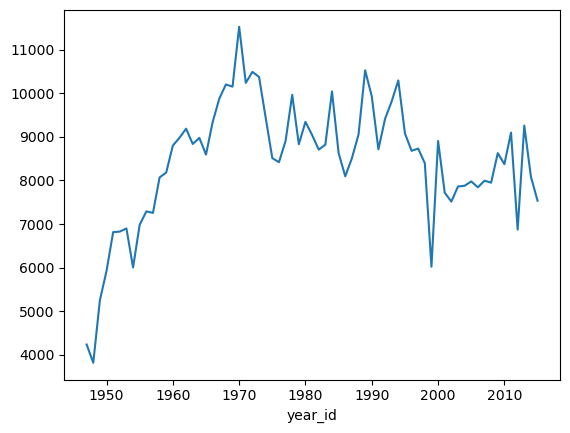

In [87]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

Die Funktion `value_counts()` liefert für eine Series die Anzahl der eindeutigen Werte zurück. Die zehn häufigsten Werte werden nun per Säulendiagramm visualisiert.

<AxesSubplot:>

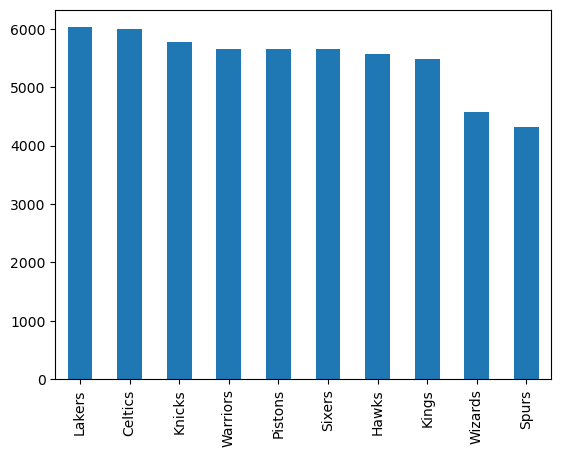

In [88]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

#### Aufgabe

Im Jahr 2013 haben die Miami Heats (fran_id = Heat) die Meisterschaft gewonnen. Erzeugen Sie ein Kuchendiagramm (= Pie) das die Anzahl der Siege und Niederlagen in dieser Saison zeigt. 
